Hi! This is my attempt to study how returns depend on wheather a close was all-time high or not.
So in these notebook we will find indexes of months that are ath closed and ones that are not.
We will define a 2 functions of perioud after close, that output average cont. comp. int. rate on this period.
One of them is for anth closed month and one if for not ath closed ones.
Then we'll plot their outputs for for periods up to 120 months.

Please note: the following code is not of the best quality and so is this research.
You should only belieave the conclusion if you have checked everything.

Feel free to contact me.
Email: constantinelarionoff@gmail.com
Telegram: @constantinelarionoff
Twitter: @constlarionoff

In [46]:
#Theese are libraries
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
import mpld3
mpld3.enable_notebook()
import pandas as pd

In [47]:
#getting data
#file s&p5001970-2020.csv is attached on GitHub
df = pd.read_csv(r"C:\Users\Constantine\Desktop\s&p5001970-2020.csv", delimiter=',')
print(df)

           Date         Open         High          Low        Close  \
0    1971-01-01    92.150002    96.489998    90.639999    95.879997   
1    1971-02-01    95.879997    99.589996    94.919998    96.750000   
2    1971-03-01    96.750000   102.029999    96.110001   100.309998   
3    1971-04-01   100.309998   105.599998    99.629997   103.949997   
4    1971-05-01   103.949997   104.419998    98.680000    99.629997   
5    1971-06-01    99.629997   102.070000    96.919998    98.699997   
6    1971-07-01    99.160004   101.519997    95.080002    95.580002   
7    1971-08-01    95.580002   101.510002    92.809998    99.029999   
8    1971-09-01    99.029999   102.250000    96.970001    98.339996   
9    1971-10-01    98.339996   100.959999    92.959999    94.230003   
10   1971-11-01    94.230003    96.080002    89.339996    93.989998   
11   1971-12-01    93.989998   102.209999    93.949997   102.089996   
12   1972-01-01   102.089996   105.000000   100.870003   103.940002   
13   1

In [12]:
#function finds max value in "Adj Close" before nth row
def high(n):
    list = []
    for i in range(0, n+1):
        list.append(df.iloc[:,5][i]) #df.iloc[:,5][i] is an i'th element of 5th column of df so it's an Adj Close value
    return max(list)
high(29)

118.050003

In [13]:
#function determines wheather a n'th month closed all time high (returns 1), or not (returns 0)
def check(n):
    if df.iloc[:,5][n] >= high(n):
        return 1
    else:
        return 0
check(4)

0

In [14]:
# a list of indexes (i) of rows that are closed all-time high
ath = [] 
for i in range(0, 589):
    if check(i) == 1:
        ath.append(i)

In [15]:
#function returns cont. comp. int. rates, inputs n - index of row, per - period after close on which we calculate r
r = lambda n, per: np.log(df.iloc[:,5][n+per]/df.iloc[:,5][n])/per

In [18]:
#function returns average value of list of floats
def a(lst):
    v = 0
    for i in lst:
        v += i
    return v/len(lst)

In [19]:
#function outputs average cont. comp. int. rate for certain period after ath close
def avg(per):
    sum = []
    for i in ath:
        try:
            sum.append(r(i, per))
        except Exception:
            continue
    w = round(12*a(sum)*100, 2)
    return w
avg(4)

6.95

In [42]:
#list of average rates for periods after ath close in range per ∈  [1, 120]
rates = []
for i in range(1, 121):
    rates.append(avg(i))
print(rates)
print(len(rates))

[6.49, 7.7, 7.1, 6.95, 8.3, 8.35, 8.58, 8.32, 8.44, 8.7, 8.85, 8.7, 8.15, 8.11, 7.65, 7.56, 7.56, 7.51, 7.68, 7.38, 7.23, 7.03, 7.08, 7.59, 7.77, 7.97, 7.86, 7.8, 7.83, 7.79, 7.83, 7.81, 7.69, 7.73, 8.01, 8.06, 8.0, 8.02, 7.79, 7.8, 7.66, 7.53, 7.43, 7.42, 7.6, 7.65, 7.91, 7.93, 7.97, 7.96, 7.89, 7.83, 7.79, 7.77, 7.56, 7.45, 7.38, 7.27, 7.28, 7.22, 7.27, 7.22, 7.16, 7.2, 7.13, 7.13, 7.06, 7.01, 7.04, 7.01, 7.08, 7.06, 7.09, 7.12, 7.09, 7.08, 7.1, 7.11, 7.08, 7.06, 7.04, 7.01, 6.98, 6.89, 6.87, 6.79, 6.72, 6.71, 6.73, 6.73, 6.73, 6.75, 6.81, 6.83, 6.89, 6.91, 6.93, 6.94, 6.9, 6.92, 6.95, 6.94, 6.93, 6.9, 6.9, 6.89, 6.81, 6.79, 6.74, 6.66, 6.67, 6.67, 6.65, 6.6, 6.54, 6.56, 6.51, 6.47, 6.45, 6.43]
120


In [26]:
#list of indexes of rows for NOT ath closed months
#same as ath, but for NOT ath closed
nath = []
for i in range(0, 589):
    if check(i) == 0:
        nath.append(i)

In [27]:
#same funct as avg, but for NOT ath closed
def navg(per):
    nsum = []
    for i in nath:
        try:
            nsum.append(r(i, per))
        except Exception:
            continue
    nw = round(12*a(nsum)*100, 2)
    return nw
navg(4)

7.15

In [43]:
#same as rates but for NOT ath closed
norates = []
for i in range(1, 121):
    norates.append(navg(i))
print(norates)
print(len(norates))

[7.42, 7.03, 7.17, 7.15, 6.71, 6.68, 6.63, 6.71, 6.66, 6.6, 6.56, 6.6, 6.75, 6.73, 6.87, 6.89, 6.89, 6.92, 6.86, 6.95, 6.99, 7.05, 7.03, 6.86, 6.81, 6.75, 6.79, 6.81, 6.81, 6.83, 6.82, 6.83, 6.87, 6.87, 6.79, 6.79, 6.82, 6.82, 6.9, 6.91, 6.96, 7.01, 7.06, 7.09, 7.07, 7.08, 7.03, 7.05, 7.05, 7.07, 7.1, 7.13, 7.15, 7.16, 7.23, 7.28, 7.31, 7.36, 7.37, 7.4, 7.39, 7.41, 7.43, 7.43, 7.46, 7.46, 7.49, 7.51, 7.5, 7.52, 7.5, 7.51, 7.51, 7.5, 7.52, 7.53, 7.53, 7.53, 7.54, 7.55, 7.57, 7.58, 7.59, 7.62, 7.63, 7.66, 7.69, 7.69, 7.69, 7.7, 7.7, 7.7, 7.68, 7.68, 7.67, 7.67, 7.67, 7.67, 7.68, 7.68, 7.68, 7.68, 7.68, 7.7, 7.7, 7.71, 7.74, 7.75, 7.77, 7.79, 7.79, 7.8, 7.8, 7.82, 7.83, 7.82, 7.84, 7.85, 7.85, 7.85]
120


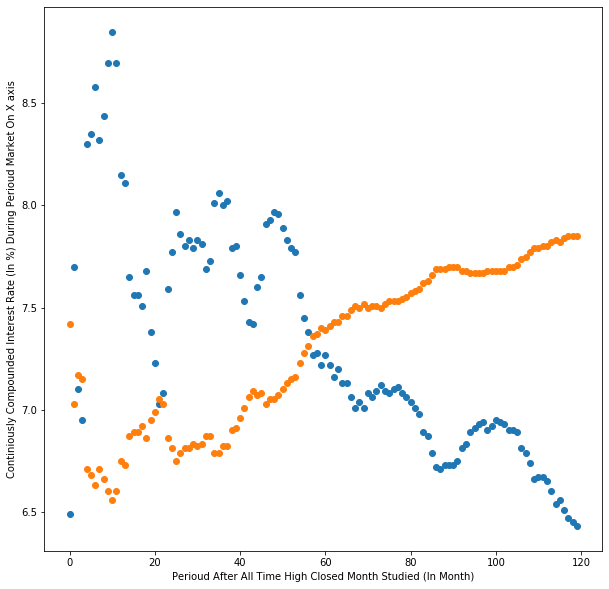

In [50]:
#plot ath closed rates and NOT ath closed norates on one plot
plt.figure(figsize=(10, 10))
plt.xlabel('Perioud After All Time High Closed Month Studied (In Month)') 
plt.ylabel('Continiously Compounded Interest Rate (In %) During Perioud Market On X axis' )
plt.plot(rates, 'o')     #in blue by default
plt.plot(norates, 'o')   #in orange by default
plt.show()